# Задача 2. Линейная регрессия, метод градиентного спуска

* **Дедлайн**: 19.03.2025, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
- [ ] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
- [ ] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [ ] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
- [ ] При обучении моделей использовать **масштабирование данных**.
- [ ] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
- [ ] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.
- [ ] Повторить тоже самое, но используя **кросс-валидацию**.
- [ ] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.
- [ ] * (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.
- [ ] * (+1 балл) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.
- [ ] * (+1 балл) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.
- [ ] * (+1 балл) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.

Реализуем функцию **gradient_descent(X, y)**

In [1]:
import numpy as np
import pandas as pd

In [2]:
def gradient_descent(x, y, lambda_reg=0.001, alpha=1e-2, epsilon=1e-4):
    """
    Обучает модель линейной регрессии с использованием градиентного спуска (MSE + L2).

    Параметры:
    x : pandas.core.frame.DataFrame
        Матрица признаков, размерности (rows, cols).
    y : pandas.core.frame.DataFrame
        Вектор целевых значений, размерности (rows, 1).
    lambda_reg : float, optional
        Коэффициент L2-регуляризации (по умолчанию 0.001).
    alpha : float, optional
        Скорость обучения (по умолчанию 1e-2).
    epsilon : float, optional
        Точность обучения (максимально возможный градиент MSE) (по умолчанию 1e-4).

    Возвращает:
    numpy.ndarray
        Оптимизированный вектор весов w и w0 - свободный член
    """

    # Стандартизация признаков (масштабирование)
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    while not x_std.all:
        x_std += 0.001
    x = (x - x_mean) / x_std

    # Добавление фиктивного признака
    x = pd.DataFrame(x)
    x['ones'] = 1
    rows, cols = x.shape
    x = x.to_numpy()
    y = y.to_numpy()

    # Инициализация весов нулями
    w = np.zeros(cols)

    delta_gradient_mse = np.zeros_like(x, dtype=float)

    # Поиск весов
    while True:
        y_pred = x.dot(w)  # Предсказания модели
        error = y_pred - y # Ошибка предсказаний

        # Градиент MSE (среднее по выборке)
        gradient_mse = 2 * (x.T.dot(error)) / rows

        delta_gradient_mse -= gradient_mse

        # Градиент L2-регуляризации
        gradient_reg = 2 * lambda_reg * w

        # Общий градиент
        total_gradient = gradient_mse + gradient_reg

        # Ограничение максимального шага
        if np.linalg.norm(alpha * total_gradient) > 1.0:
            total_gradient /= np.linalg.norm(alpha * total_gradient)

        # Шаг по градиенту
        w[:cols - 1] -=  alpha * total_gradient[:cols - 1]
        w[cols - 1] -= alpha * gradient_mse[cols - 1]

        #Проверка нормы общего градиента (MSE + L2)
        if (np.linalg.norm(total_gradient) < epsilon
                or np.linalg.norm(total_gradient) == np.inf
                or np.linalg.norm(total_gradient) == np.nan
                or np.linalg.norm(delta_gradient_mse) < epsilon):
            break

        delta_gradient_mse = gradient_mse

    # Обратное преобразование весов
    w[:cols - 1] = w[:cols - 1] / x_std
    w[cols - 1] = w[cols - 1] - np.sum(x_mean * w[:cols - 1])
    return w[:cols - 1], w[cols - 1]

Также реализуем функцию Stochastic Gradient Descent

In [3]:
def stochastic_gradient_descent(x, y, lambda_reg=0.001, alpha=1e-2, epsilon=1e-4, max_epochs=1000, patience=10):
    """
    Обучает модель линейной регрессии с использованием стохастического градиентного спуска (MSE + L2).

    Параметры:
    x : pandas.core.frame.DataFrame
        Матрица признаков, размерности (rows, cols).
    y : pandas.core.frame.DataFrame
        Вектор целевых значений, размерности (rows, 1).
    lambda_reg : float, optional
        Коэффициент L2-регуляризации (по умолчанию 0.001).
    alpha : float, optional
        Скорость обучения (по умолчанию 1e-2).
    epsilon : float, optional
        Точность обучения (максимально возможный градиент MSE) (по умолчанию 1e-4).
    max_epochs : int, optional
        Максимальное количество эпох (по умолчанию 1000).
    patience : int, optional
        Количество эпох для ранней остановки (по умолчанию 5).

    Возвращает:
    numpy.ndarray
        Оптимизированный вектор весов w.
    float
        Свободный член (bias).
    """

    # Стандартизация признаков (масштабирование)
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    while not x_std.all():
        x_std += 0.001
    x = (x - x_mean) / x_std

    # Добавление фиктивного признака для смещения (bias)
    x = pd.DataFrame(x)
    x['ones'] = 1
    rows, cols = x.shape
    x = x.to_numpy()
    y = y.to_numpy()

    # Инициализация весов нулями
    w = np.zeros(cols)
    best_w = w.copy()
    min_loss = float('inf')
    wait = 0  # Счетчик для ранней остановки

    # Обучение
    for epoch in range(max_epochs):
        # Перемешивание данных
        indices = np.random.permutation(rows)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        # Обработка примеров по одному
        for i in range(rows):
            # Берем один пример
            xi = x_shuffled[i]
            yi = y_shuffled[i]

            # Предсказание модели
            y_pred = xi.dot(w)
            error = y_pred - yi.ravel()

            # Градиент MSE (для одного примера)
            gradient_mse = 2 * error * xi

            # Градиент L2-регуляризации (кроме bias)
            gradient_reg = 2 * lambda_reg * w
            gradient_reg[-1] = 0  # Не регуляризуем bias

            # Общий градиент
            total_gradient = gradient_mse + gradient_reg

            # Ограничение максимального шага
            if np.linalg.norm(alpha * total_gradient) > 1.0:
                total_gradient /= np.linalg.norm(alpha * total_gradient)

            # Обновление весов
            w[:cols - 1] -= alpha * total_gradient[:cols - 1]
            w[cols - 1] -= alpha * gradient_mse[cols - 1]

        # Вычисление ошибки на всем наборе данных
        y_pred_full = x.dot(w)
        error_full = y_pred_full - y.ravel()
        loss = np.mean(error_full ** 2)

        # Ранняя остановка
        if loss < min_loss:
            min_loss = loss
            best_w = w.copy()
            wait = 0  # Сброс счетчика
        else:
            wait += 1
            if wait >= patience:
                break

        # Вычисление полного градиента для проверки критерия остановки
        y_pred_full = x.dot(w)
        error_full = y_pred_full - y.ravel()
        gradient_mse_full = 2 * (x.T.dot(error_full)) / rows
        gradient_reg_full = 2 * lambda_reg * w
        gradient_reg_full[-1] = 0  # Не регуляризуем bias
        total_gradient_full = gradient_mse_full + gradient_reg_full

        # Проверка нормы общего градиента (MSE + L2)
        if np.linalg.norm(total_gradient_full) < epsilon:
            break

    # Обратное преобразование весов
    weights = best_w[:-1] / x_std
    bias = best_w[-1] - np.sum(x_mean * weights)

    return weights, bias

И Mini Batch Gradient Descent

In [4]:
def mini_batch_gradient_descent(
        x: pd.DataFrame,
        y: pd.DataFrame,
        lambda_reg: float = 0.001,
        max_iter: int = 1000,
        batch_size: int = 32
) -> tuple[np.ndarray, float]:
    # 1. Преобразование y в одномерный массив
    y_array = y.values.flatten()  # Преобразуем в 1D array

    # 2. Стандартизация данных
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    y_mean = y_array.mean()

    # 3. Добавление intercept
    x_final = np.c_[x_scaled, np.ones(x.shape[0])]
    n_features = x_final.shape[1]

    # 4. Инициализация параметров
    theta = np.zeros(n_features)
    best_theta = theta.copy()
    best_loss = float('inf')

    for iteration in range(max_iter):
        # Перемешивание данных
        permutation = np.random.permutation(x.shape[0])
        x_shuffled = x_final[permutation]
        y_shuffled = y_array[permutation]

        # Обработка мини-батчей
        for i in range(0, x.shape[0], batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Вычисление градиента
            predictions = x_batch.dot(theta)
            errors = predictions - y_batch
            gradient = (2 / batch_size) * x_batch.T.dot(errors)

            # L2 регуляризация (кроме intercept)
            gradient[:-1] += 2 * lambda_reg * theta[:-1]

            # Обновление параметров
            theta -= 0.01 * gradient  # Фиксированный learning rate

        # Проверка сходимости
        predictions = x_final.dot(theta)
        current_loss = np.mean((predictions - y_array) ** 2)

        if current_loss < best_loss:
            best_loss = current_loss
            best_theta = theta.copy()

    # Возвращаем weights и intercept
    weights = best_theta[:-1] / scaler.scale_
    intercept = best_theta[-1] - np.sum(scaler.mean_ * weights)

    return weights, intercept


Возьмем датасет insurance.csv\
Он содержит информацию о пациентах и стоимости страховки.\
Многие факторы, влияющие на размер вашей оплаты медицинской страховки, находятся вне вашего контроля. Тем не менее, хорошо иметь представление о том, что это такое. Вот некоторые факторы, влияющие на стоимость страховых взносов

## Описание датасета

* age: возраст основного бенефициара

* sex: пол страховщика, женский, мужской

* bmi: индекс массы тела, дающий представление о теле, весе, который относительно высок или низок по отношению к росту, объективный индекс массы тела (кг/м^2) с использованием соотношения роста к весу, в идеале от 18,5 до 24,9

* children: количество детей, охваченных медицинской страховкой/количество иждивенцев

* smoker: курящий или нет

* region: район проживания бенефициара в США, северо-восток, юго-восток, юго-запад, северо-запад

## Exploratory Data Analysis

Считаем данные

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Нет пропусков, отлично. Посмотрим на распределение стоимости страховки

Text(0.5, 1.0, 'Distribution of Charges')

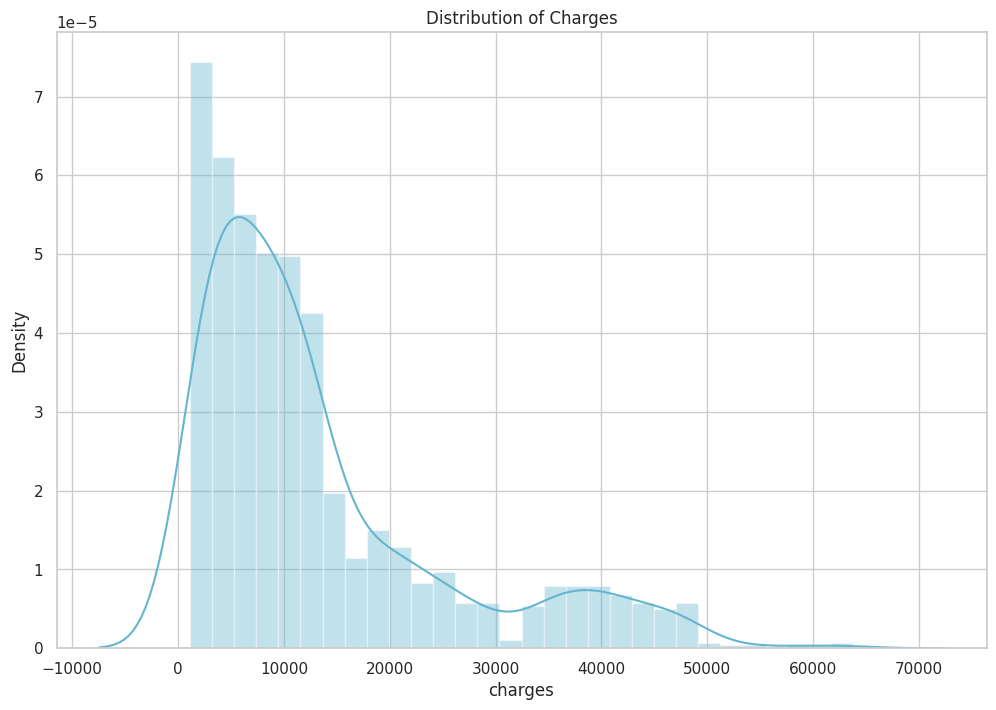

In [9]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

Посмотрим на связь с регионом

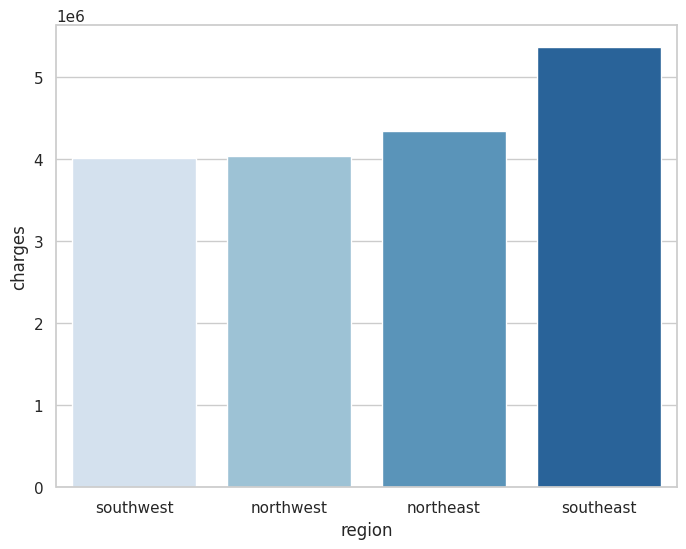

In [10]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(y=charges.head(), x=charges.head().index, palette='Blues')

Итак, в целом самые высокие медицинские расходы на Юго-Востоке, а самые низкие на Юго-Западе. Принимая во внимание определенные факторы (пол, курение, наличие детей), давайте посмотрим, как это изменится по регионам

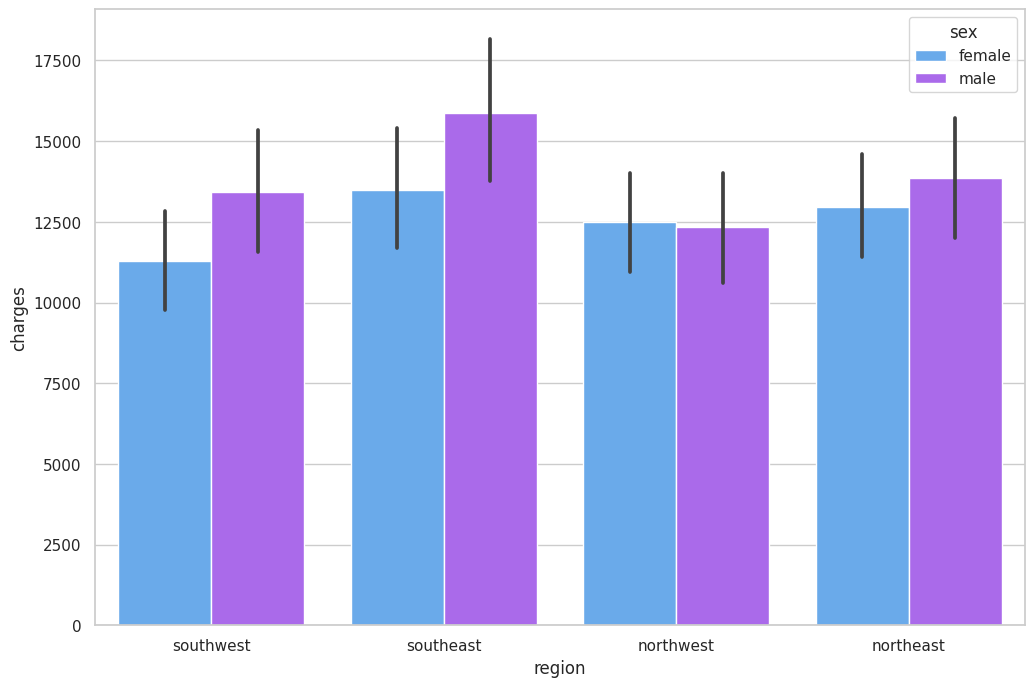

In [11]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

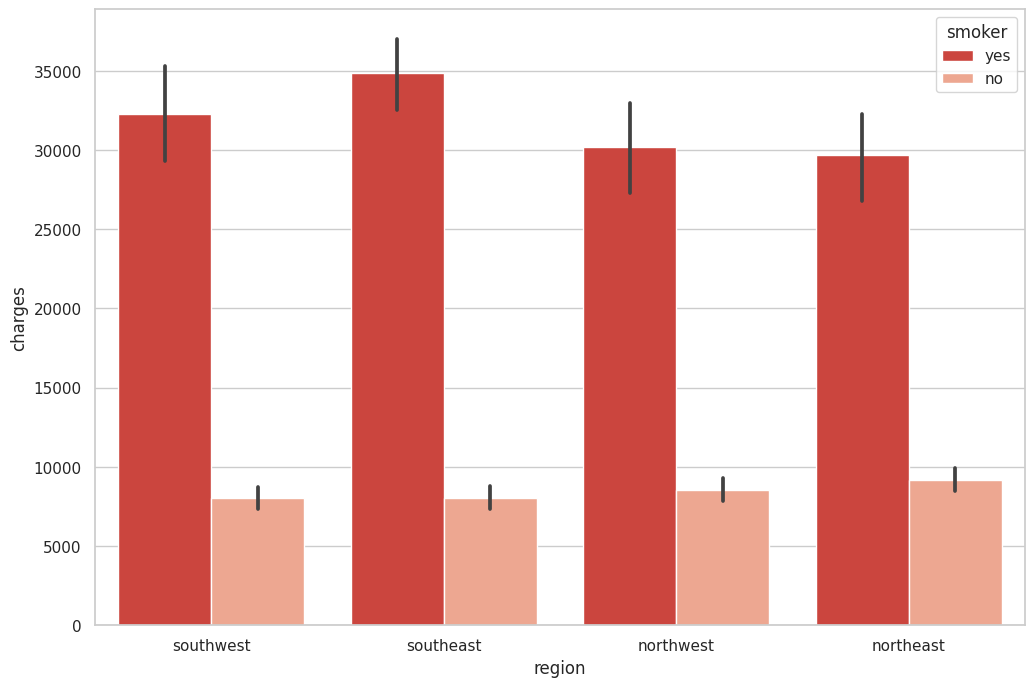

In [12]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

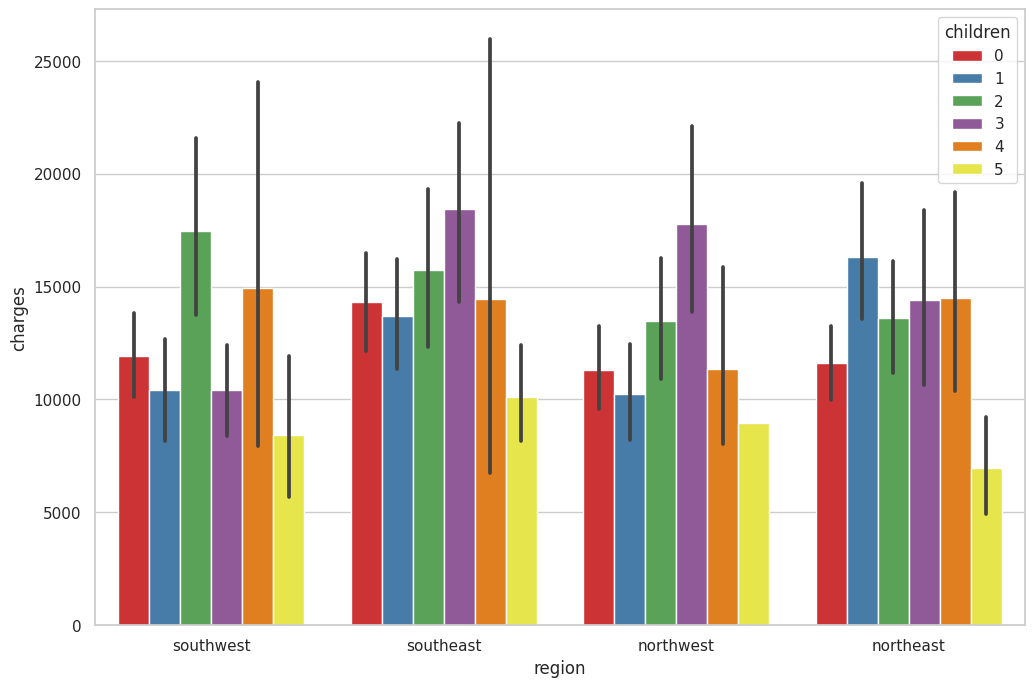

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

Как мы видим из этих столбчатых диаграмм, самые высокие расходы из-за курения по-прежнему на Юго-Востоке, но самые низкие — на Северо-Востоке. Люди на Юго-Западе, как правило, курят больше, чем люди на Северо-Востоке, но у людей на Северо-Востоке расходы выше по полу, чем на Юго-Западе и Северо-Западе. И люди с детьми, как правило, также несут более высокие медицинские расходы.

Теперь давайте проанализируем медицинские расходы по возрасту, ИМТ и детям в соответствии с фактором курения

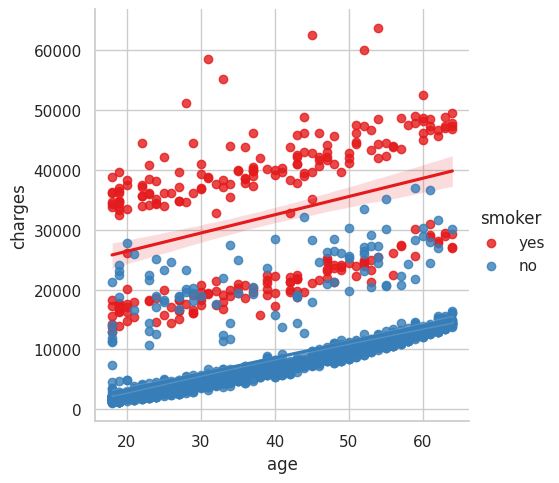

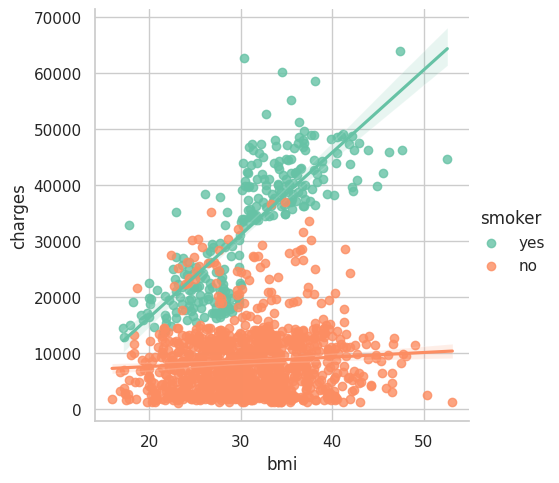

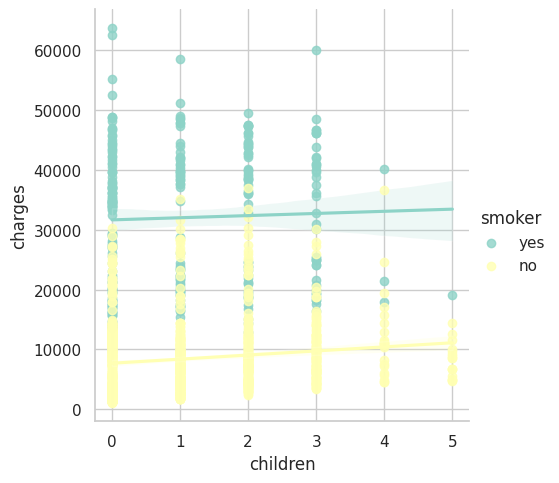

In [14]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')


Курение оказывает наибольшее влияние на медицинские расходы, несмотря на то, что расходы растут с возрастом, ИМТ и детьми. Также люди, у которых есть дети, как правило, курят меньше, что также показывают следующие графики violinplots

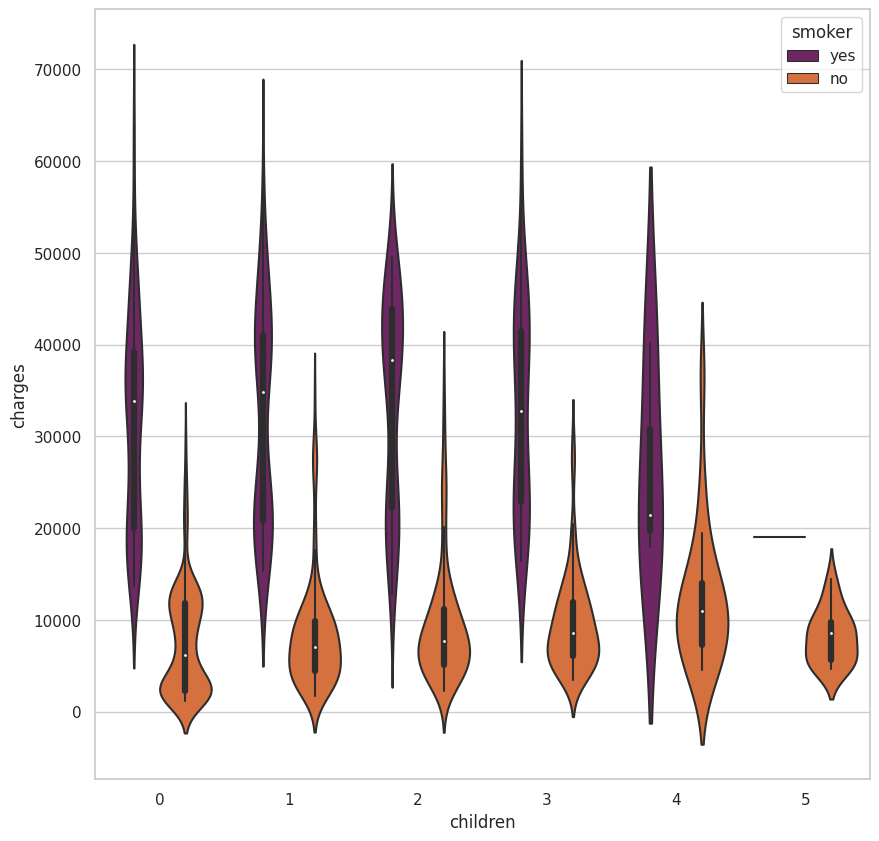

In [15]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

## Exploratory Data Analysis

Переделаем текстовые признаки sex, smoker, region в численные

In [16]:
df[['sex', 'smoker', 'region']].apply(pd.unique)

sex                                     [female, male]
smoker                                       [yes, no]
region    [southwest, southeast, northwest, northeast]
dtype: object

In [17]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].apply(label.fit_transform)
df[['sex', 'smoker', 'region']].apply(pd.unique)

sex             [0, 1]
smoker          [1, 0]
region    [3, 2, 1, 0]
dtype: object

In [18]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

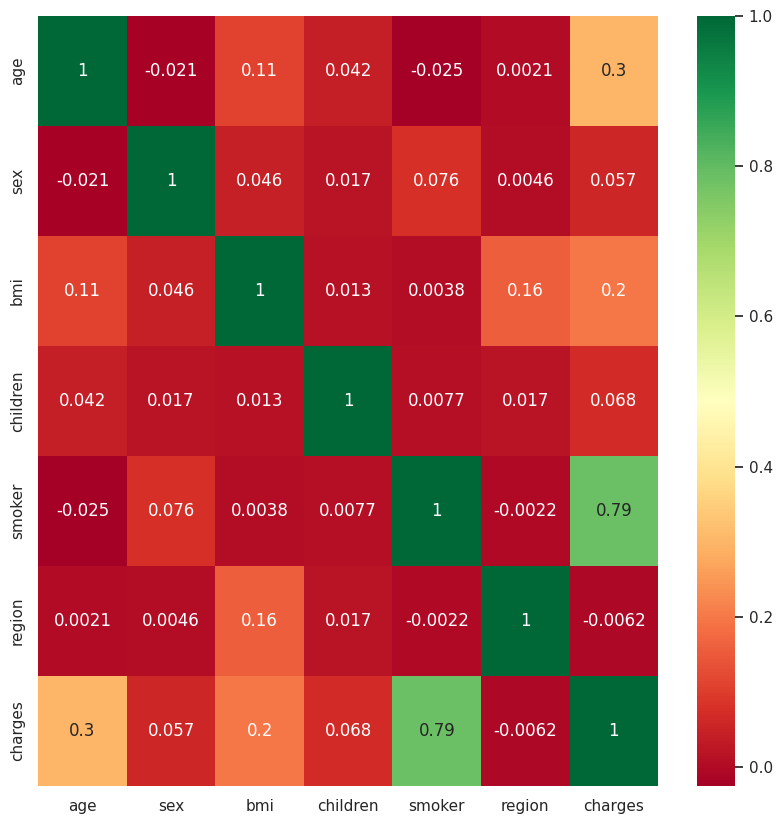

In [19]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

Корреляция только с курением.\
Разделим данные на тестовые и обучающие выборки

In [20]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

Определим наилучшее количество признаков (и само подмножество), используя Recursive Feature Elimination (RFE) из sklearn.

Feature importance ranking


1.smoker(0.600597)
2.bmi(0.225952)
3.age(0.133343)
4.children(0.020389)
5.region(0.013730)
6.sex(0.005989)


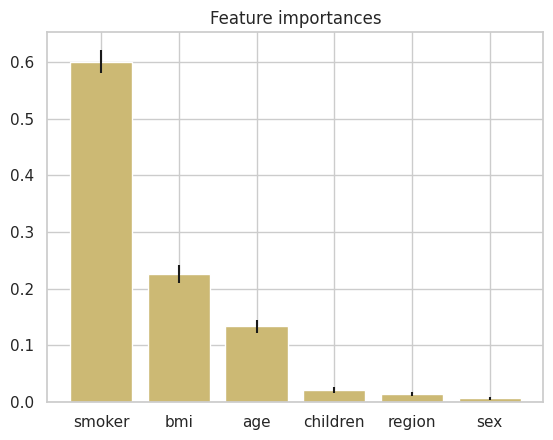

In [21]:
from sklearn.ensemble import RandomForestRegressor as rfr
Rfr = rfr(n_estimators = 100, criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(X_train,y_train)

print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center");

Как мы видим, признаки children, region, sex влияют на результат меньше всего. Исключим их

Feature importance ranking


1.smoker(0.601683)
2.bmi(0.265221)
3.age(0.133096)


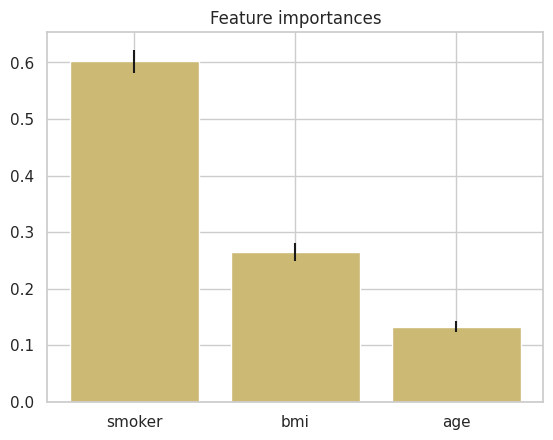

In [22]:
x = df.drop(['charges', 'children', 'region', 'sex'], axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

Rfr = rfr(n_estimators = 100, criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(X_train,y_train)

print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'bmi', 'smoker']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center");

Создадим классы-обертки для наших функций, затем найдем лучшие гиперпараметры для нашей модели и для модели Ridge

In [23]:
from sklearn.base import BaseEstimator, RegressorMixin

class GradientDescentWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, lambda_reg=0.001, alpha=0.01):
        self.lambda_reg = lambda_reg
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        # Обучаем модель с помощью gradient_descent
        self.weights, self.bias = gradient_descent(x, y, lambda_reg=self.lambda_reg, alpha=self.alpha)
        return self

    def predict(self, x):
        # Предсказание
        return np.dot(x, self.weights) + self.bias

class StochasticGradientDescentWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, lambda_reg=0.001, alpha=0.01, max_epochs=1000, patience=10):
        self.lambda_reg = lambda_reg
        self.alpha = alpha
        self.max_epochs = max_epochs
        self.patience = patience
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        # Обучаем модель с помощью stochastic_gradient_descent
        self.weights, self.bias = stochastic_gradient_descent(x, y, lambda_reg=self.lambda_reg, alpha=self.alpha, max_epochs=self.max_epochs, patience=self.patience)
        return self

    def predict(self, x):
        # Предсказание
        return np.dot(x, self.weights) + self.bias

class MiniBatchGradientDescentWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, lambda_reg=0.001, max_iter=1000, batch_size=32):
        self.lambda_reg = lambda_reg
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        # Обучаем модель с помощью mini_batch_gradient_descent
        self.weights, self.bias = mini_batch_gradient_descent(x, y, lambda_reg=self.lambda_reg, max_iter=self.max_iter, batch_size=self.batch_size)
        return self

    def predict(self, x):
        # Предсказание
        return np.dot(x, self.weights) + self.bias

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Создаем пайплайн с нормализацией и моделью
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

# Задаем сетку гиперпараметров
param_grid = [{
                'model': [Ridge()],
                'model__alpha': [0.001, 0.01, 0.1],  # Пример значений для alpha
             },
             {
                'model': [GradientDescentWrapper()],
                'model__alpha': [0.001, 0.01, 0.1],  # Пример значений для alpha
                'model__lambda_reg': [0.001, 0.01, 0.1]  # Коэффициент регуляризации
             },
             {
                'model': [StochasticGradientDescentWrapper()],
                'model__alpha': [0.001, 0.01],  # Пример значений для alpha
                'model__lambda_reg': [0.001, 0.01],  # Коэффициент регуляризации
                'model__patience': [5, 10, 20],
                'model__max_epochs': [2500, 5000]
             },
             {
                'model': [MiniBatchGradientDescentWrapper()],
                'model__max_iter': [1000, 1500],  # Пример значений для alpha
                'model__lambda_reg': [0.001, 0.01, 0.1], # Коэффициент регуляризации
                'model__batch_size': [16, 32, 64]
             }
            ]

# Используем GridSearchCV для поиска лучших гиперпараметров
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Добавляем колонку с именем модели
results_df['model_name'] = results_df['param_model'].apply(lambda x: x.__class__.__name__)

# Удаляем строки с NaN в mean_test_score
results_df = results_df.dropna(subset=['model_name'])

# Функция для удаления ключа 'model' и префикса 'model__'
def clean_params(params):
    return {key.replace('model__', ''): value for key, value in params.items() if key != 'model'}

# Применяем функцию к колонке 'params'
results_df['params'] = results_df['params'].apply(clean_params)

# Группируем по имени модели и находим лучшие параметры для каждой
best_params_per_model = results_df.loc[results_df.groupby('model_name', sort=False)['mean_test_score'].idxmax()]

# Теперь можно обращаться к параметрам по имени модели:
ridge_params = best_params_per_model.get('Ridge', {})
gradient_params = best_params_per_model.get('GradientDescentWrapper', {})
sgd_params = best_params_per_model.get('StochasticGradientDescentWrapper', {})
mini_batch_params = best_params_per_model.get('MiniBatchGradientDescentWrapper', {})

# Выводим результат через DataFrame без индексов
best_params_per_model[['model_name', 'params']].style.hide(axis='index')

model_name,params
Ridge,{'alpha': 0.1}
GradientDescentWrapper,"{'alpha': 0.1, 'lambda_reg': 0.001}"
StochasticGradientDescentWrapper,"{'alpha': 0.01, 'lambda_reg': 0.001, 'max_epochs': 5000, 'patience': 20}"
MiniBatchGradientDescentWrapper,"{'batch_size': 16, 'lambda_reg': 0.001, 'max_iter': 1000}"


Используем наши функции для исследуемого датасета и оценим результаты с помощью *MSE*, *RMSE*, $R^2$

In [24]:
from sklearn import metrics

# Создаем модели с лучшими параметрами
ridge_model = Ridge(**ridge_params)
gradient_model = GradientDescentWrapper(**gradient_params)
sgd_model = StochasticGradientDescentWrapper(**sgd_params)
mini_batch_model = MiniBatchGradientDescentWrapper(**mini_batch_params)

# Список моделей и их имен
models = {
    'Ridge': ridge_model,
    'GradientDescent': gradient_model,
    'StochasticGradientDescent': sgd_model,
    'MiniBatchGradientDescent': mini_batch_model
}

# Функция для вычисления метрик
def calculate_metrics(y_true, y_pred):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_true, y_pred)
    return mse, rmse, r2

# Создаем таблицу для хранения результатов
results = []

# Обучаем модели и вычисляем метрики
for model_name, model in models.items():
    # Обучение модели
    if model_name == 'Ridge':
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Вычисление метрик
    mse, rmse, r2 = calculate_metrics(y_test, y_pred)
    
    # Добавляем результаты в таблицу
    results.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    })

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)

# Выводим таблицу через DataFrame
results_df.style.hide(axis='index')

Model,MSE,RMSE,R^2
Ridge,27598110.922422,5253.390422,0.800984
GradientDescent,27598576.179411,5253.434703,0.800981
StochasticGradientDescent,28284186.358389,5318.287916,0.796037
MiniBatchGradientDescent,27594742.687813,5253.069835,0.801008


Все результаты схожи друг с другом


## Cross validation

Напишем функцию, которая, используя cross validation из библиотеки skylearn, возвращает предсказание для каждого fold'а.
Применим ее для наших данных и составим таблицу ошибок.

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import metrics

def cross_val_predict(x, y, k=5, model=None):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    y_pred = np.zeros((2, k), dtype=np.ndarray)
    folds = np.ndarray((2, k), dtype=np.ndarray)
    
    i=0
    for train_index, test_index in kf.split(x):
        folds[0][i] = train_index
        folds[1][i] = test_index
        
        X_train, X_test = pd.DataFrame(x, index=train_index), pd.DataFrame(x, index=test_index)
        y_train = y[train_index]
        
        model.fit(X_train, y_train)
        y_pred[0][i] = model.predict(X_train)
        y_pred[1][i] = model.predict(X_test)
        
        i+=1
        
    return y_pred, folds

def calculate_all_metrics(y, folds, y_pred):
    results = {
        'mse_train': np.array([metrics.mean_squared_error(y[folds[0][i]], y_pred[0][i]) for i in range(5)]),
        'mse_test': np.array([metrics.mean_squared_error(y[folds[1][i]], y_pred[1][i]) for i in range(5)]),
        'rmse_train': np.array([metrics.mean_squared_error(y[folds[0][i]], y_pred[0][i], squared=False) for i in range(5)]),
        'rmse_test': np.array([metrics.mean_squared_error(y[folds[1][i]], y_pred[1][i], squared=False) for i in range(5)]),
        'r2_train': np.array([metrics.r2_score(y[folds[0][i]], y_pred[0][i]) for i in range(5)]),
        'r2_test': np.array([metrics.r2_score(y[folds[1][i]], y_pred[1][i]) for i in range(5)])
    }
    return results

def create_metrics_dataframe(metrics_dict, model_name):
    # Создаем список метрик для DataFrame
    metrics_list = []
    for metric_name in ['mse', 'rmse', 'r2']:
        for dataset in ['train', 'test']:
            key = f"{metric_name}_{dataset}"
            values = metrics_dict[key]
            metrics_list.append({
                'Metric': f"{metric_name}-{dataset}",
                'Fold1': values[0],
                'Fold2': values[1],
                'Fold3': values[2],
                'Fold4': values[3],
                'Fold5': values[4],
                'Mean': values.mean(),
                'STD': values.std()
            })
    
    # Создаем DataFrame
    df = pd.DataFrame(metrics_list)
    df.set_index('Metric', inplace=True)
    df.index.name = None  # Убираем название индекса
    df.columns.name = model_name
    return df

# Оценка каждой модели
for model_name, model in models.items():
    y_pred, folds = cross_val_predict(x, y, k=5, model=model)
    metrics_results = calculate_all_metrics(y, folds, y_pred)
    df_metrics = create_metrics_dataframe(metrics_results, model_name)

    display(df_metrics.style.format("{:.4f}"))

Ridge,Fold1,Fold2,Fold3,Fold4,Fold5,Mean,STD
mse-train,37641040.6718,36941100.6012,37943198.6233,35883854.2830,36473846.8843,36976608.2127,751519.5818
mse-test,34548347.0355,37355209.2069,33414574.0532,41835123.5265,39345649.1554,37299780.5955,3079714.3539
rmse-train,6135.2295,6077.9191,6159.8051,5990.3134,6039.3582,6080.5250,61.8345
rmse-test,5877.7842,6111.8908,5780.5341,6468.0077,6272.6110,6102.1656,251.7064
r2-train,0.7392,0.7494,0.7329,0.7682,0.7468,0.7473,0.0119
r2-test,0.7775,0.7386,0.7958,0.6300,0.7488,0.7381,0.0578


GradientDescent,Fold1,Fold2,Fold3,Fold4,Fold5,Mean,STD
mse-train,37638180.1047,36938261.0877,37940254.3898,35880796.8834,36471039.0321,36973706.2995,751548.0537
mse-test,34518362.3110,37327268.8230,33381076.5616,41961969.7661,39297041.3209,37297143.7565,3124685.8429
rmse-train,6134.9963,6077.6855,6159.5661,5990.0582,6039.1257,6080.2864,61.8394
rmse-test,5875.2330,6109.6046,5777.6359,6477.8059,6268.7352,6101.8029,255.2347
r2-train,0.7392,0.7495,0.7329,0.7682,0.7468,0.7473,0.0119
r2-test,0.7777,0.7388,0.7960,0.6289,0.7491,0.7381,0.0583


StochasticGradientDescent,Fold1,Fold2,Fold3,Fold4,Fold5,Mean,STD
mse-train,38528091.7471,38110645.3240,38990287.7433,37248513.7234,37645298.8044,38104567.4685,617683.7185
mse-test,35424704.9724,38322034.4542,35229223.4304,40632883.8107,41410889.4070,38203947.2150,2560129.8734
rmse-train,6207.1001,6173.3820,6244.2203,6103.1560,6135.5765,6172.6870,50.0270
rmse-test,5951.8657,6190.4793,5935.4211,6374.3928,6435.1293,6177.4576,207.2781
r2-train,0.7331,0.7415,0.7255,0.7594,0.7386,0.7396,0.0113
r2-test,0.7718,0.7319,0.7847,0.6406,0.7356,0.7329,0.0504


MiniBatchGradientDescent,Fold1,Fold2,Fold3,Fold4,Fold5,Mean,STD
mse-train,37638092.4969,36938234.8156,37940194.9415,35880758.3994,36470985.3217,36973653.1950,751535.8967
mse-test,34513041.6619,37328666.8160,33366267.2813,42007172.0616,39290216.5082,37301072.8658,3141994.1591
rmse-train,6134.9892,6077.6833,6159.5613,5990.0550,6039.1212,6080.2820,61.8384
rmse-test,5874.7801,6109.7190,5776.3542,6481.2940,6268.1908,6102.0676,256.5997
r2-train,0.7392,0.7495,0.7329,0.7682,0.7468,0.7473,0.0119
r2-test,0.7777,0.7388,0.7961,0.6285,0.7491,0.7380,0.0584


Вывод: результаты с cross validation стали немного хуже.